LINEAR REGRESSION BEST FIT OF THE GRAPH

Estimated coefficients: 
b0 = -7.55255908365973 
b1 = 143.41307814992027


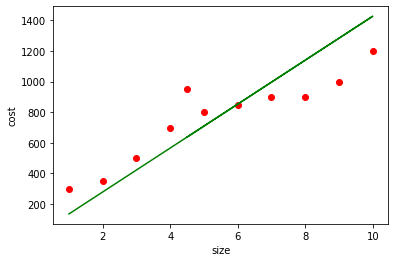

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def estimate_coefficients(x,y):
    n = np.size(x)
    mean_x,mean_y = np.mean(x),np.mean(y)
    ss_xy = np.sum(y*x - n*mean_y*mean_x)
    ss_xx = np.sum(x*x - n*mean_x*mean_x)
    b1 = ss_xy/ss_xx
    b0 = mean_y-b1*mean_x
    return (b0,b1)
    
def plot_regression_line(x,y,b):
    plt.scatter(x,y,color = "r",marker = "o")
    y_pred = b[1]*x+b[0]
    plt.plot(x,y_pred,color="g")
    plt.xlabel("size")
    plt.ylabel("cost")
    plt.show()
    
    
x = np.array([1,2,3,4,5,6,7,8,9,10,4.5])
y = np.array([300,350,500,700,800,850,900,900,1000,1200,950])

b = estimate_coefficients(x,y)
print("Estimated coefficients: \nb0 = {} \nb1 = {}".format(b[0],b[1]))
plot_regression_line(x,y,b)

In [2]:
import pandas as pd
vehicle  = pd.read_csv(r"C:\Users\SAI RAM\OneDrive\pramod.csv")
small_vehicle = vehicle.head()
small_vehicle.head(5)

,Vehicle,fm,Mileage,lh,lc,mc,State
0,1,0.0,863.0,1.1,66.30,697.23,MS
1,2,10.0,4644.0,2.4,233.03,119.66,CA
2,3,15.0,16330.0,4.2,325.08,175.46,WI
3,4,0.0,13.0,1.0,66.64,0.00,OR
4,5,13.0,22537.0,4.5,328.66,175.46,AZ


In [3]:
data = small_vehicle.loc[:,['Mileage','mc']]
data.head(5)

,Mileage,mc
0,863.0,697.23
1,4644.0,119.66
2,16330.0,175.46
3,13.0,0.00
4,22537.0,175.46


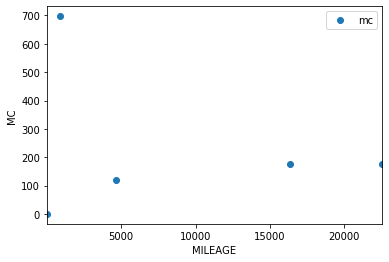

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

data.plot(x = 'Mileage',y = 'mc',style = 'o')
plt.xlabel("MILEAGE")
plt.ylabel("MC")
plt.show()

In [5]:
import pandas as pd

x = pd.DataFrame(data["Mileage"])
y = pd.DataFrame(data['mc'])

In [6]:
x.size, y.size

(5, 5)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4, 1)
(1, 1)
(4, 1)
(1, 1)


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(regressor.intercept_)

[286.98095568]


In [10]:
print(regressor.coef_)

[[-0.00554492]]


In [11]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ['PREDICTED'])
y_pred

,PREDICTED
0,196.432411


In [12]:
from sklearn import metrics
import numpy as np
print("Mean absolute error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean absolute error", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean absolute error 20.972410746429404
Mean squared error 439.84201251694753
Root Mean absolute error 4.579564471260275


MULTIPLE LINEAR REGRESSION

In [13]:
data = small_vehicle
import pandas as pd

x = pd.DataFrame(data.iloc[:,:-2])
y = pd.DataFrame(data.iloc[:,-2])


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4, 5)
(1, 5)
(4, 1)
(1, 1)


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
v = pd.DataFrame(regressor.coef_,index = ["co--efficient"]).transpose()
w = pd.DataFrame(x.columns, columns = ['ATTRIBUTE'])

In [17]:
v 

,co--efficient
0,-214.979280
1,11.377717
2,0.059601
3,1.951377
4,-4.223932


In [18]:
w

,ATTRIBUTE
0,Vehicle
1,fm
2,Mileage
3,lh
4,lc
